# US Dataset

In [2]:
# For data manipulation
import numpy as np
import pandas as pd
import nltk

# Scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from mlxtend.plotting import plot_confusion_matrix

# For data visualization
import matplotlib.pyplot as plt

In [3]:
# Importing data
fake = pd.read_csv('Fake.csv')
real = pd.read_csv('True.csv')

# Removing unneedded columns
fake.drop(['subject','date'], axis=1)
real.drop(['subject', 'date'], axis=1)

,title,text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...
...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l..."
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...


In [5]:
# Labelling data before concatenation
fake['label'] = 'fake'
real['label'] = 'real'

# Concatenate data an shuffle the items
datas = pd.concat([fake,real], axis=0)
datas = datas.sample(frac=1).reset_index(drop=True)
datas.head()

,title,text,subject,date,label
0,"Despite apology, Indonesia asks why U.S. block...",JAKARTA (Reuters) - Indonesia said on Monday i...,worldnews,"October 23, 2017",real
1,BREAKING: WIKILEAKS EMAILS SUGGEST Supreme Cou...,Here s what we ve got with the new e-mails and...,left-news,"Oct 13, 2016",fake
2,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 7, 2016",real
3,DONALD TRUMP’S Touching Gesture After Rally Ca...,The Americans who ve lost a loved one to an il...,politics,"May 29, 2016",fake
4,Spy chiefs pressure Congress to renew expiring...,WASHINGTON (Reuters) - The leaders of the U.S....,politicsNews,"December 21, 2017",real


In [6]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(datas['text'], datas['label'], test_size=0.25)
print(np.array(X_test).shape)

(11225,)


In [7]:

nltk.download('stopwords')
my_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train = my_tfidf.fit_transform(X_train)
tfidf_test = my_tfidf.transform(X_test)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\franz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_clf = PassiveAggressiveClassifier()
pa_clf.fit(tfidf_train, y_train)

PassiveAggressiveClassifier()

The accuracy of prediction is 99.47%.

The F1 score is 0.994.



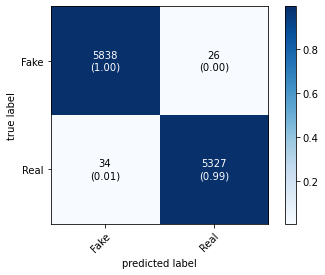

In [37]:
pa_pred = pa_clf.predict(tfidf_test)

conf_mat = confusion_matrix(y_test, pa_pred)
plot_confusion_matrix(conf_mat,
                      show_normed=True, colorbar=True,
                      class_names=['Fake', 'Real'])

accscore = accuracy_score(y_test, pa_pred)
f1score = f1_score(y_test,pa_pred,pos_label='real')

print('The accuracy of prediction is {:.2f}%.\n'.format(accscore*100))
print('The F1 score is {:.3f}.\n'.format(f1score))

The accuracy of prediction is 99.38%.

The F1 score is 0.993.



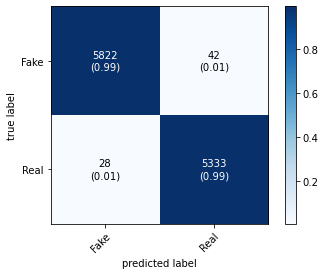

In [38]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state = 0, penalty='l1', solver='saga', max_iter=1000)
lr_clf.fit(tfidf_train, y_train)
lr_pred = lr_clf.predict(tfidf_test)

conf_mat = confusion_matrix(y_test, lr_pred)
plot_confusion_matrix(conf_mat,
                      show_normed=True, colorbar=True,
                      class_names=['Fake', 'Real'])

accscore = accuracy_score(y_test, lr_pred)
f1score = f1_score(y_test,lr_pred,pos_label='real')
print('The accuracy of prediction is {:.2f}%.\n'.format(accscore*100))
print('The F1 score is {:.3f}.\n'.format(f1score))

[0.9937639198218263, 0.9946547884187082]


Text(0.5, 1.0, 'Model Accuracies')

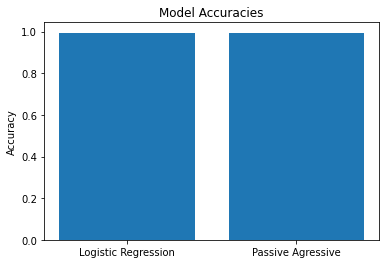

In [11]:
models = ["Logistic Regression", "Passive Agressive"]
accuracies = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, pa_pred)]
print(accuracies)

plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.title("Model Accuracies")

In [34]:
testing = my_tfidf.transform(["Former President Barack Obama announced late last night that he had filed for divorce from his wife of 27 years, Michelle Obama, after he revealed a secret double life as a homosexual. “It is with a bit of sadness and a whole lot of relief that I announce that Michelle and I have decided to separate, as I have admitted to her, as I’m doing now to the rest of the world, that I am a homosexual,” said Barack Obama. “This may come as a shock to many, and anger others, but this is my personal business, and I would hope that everyone could respect my privacy at this time” Representatives for Michelle Obama said that she and the former president would split amicably, and that Michelle herself was “not particularly shocked” by the revelation. “We are very close, as close as two people could ever be, really,” said Michelle in a prepared statement. “I’ve known for many years about Barack’s secret life, and I fully support him in the direction that his life takes him. He was and is an incredible leader, a loving father and family man, and now he can go on to make some other guy, or multiple guys, very happy.” “Honestly, I was prepared to just stay with her,” said Barack. “I think she’s secretly know for years that I was gay, and since it already came out in every conservative news site years ago that Michelle was actually born a man, I figured that was close enough. I was prepared to stick it out and keep having young guys on the side. Michelle nixed it, though. She said if this was going to become public news, then there’s no reason we shouldn’t just split up and reveal our true selves. Whoops, I guess I just proved those rumors about her secret to be true, too. Damn, sorry Michelle!” Representatives for the Obama children, Malia and Sasha, could not be reached for comment, but their Facebook pages both were vacant of any comments on the split."])
print("Passive Aggressive: " + str(pa_clf.predict(testing)))
print("Logistic Regression: " + str(lr_clf.predict(testing)))

Passive Aggressive: ['fake']
Logistic Regression: ['fake']


In [35]:
def detectFake(content):
    """Function where you can input news content and it will return whether the 3 models believe it to be fake or real news"""
    content_tf = my_tfidf.transform([content])
    print("Judgement of each model:")
    print("\tPassive Aggressive: " + str(pa_clf.predict(content_tf)))
    print("\tLogistic Regression: " + str(lr_clf.predict(content_tf)))
    
    if str(pa_clf.predict(content_tf))=="['real']":
        var_pa = 1.0
    else:
        var_pa = 0.0
    if str(lr_clf.predict(content_tf))=="['real']":
        var_lr = 1.0
    else:
        var_lr = 0.0  
        
    #Gets weighted average to make final judgement whether the news is true or false
    X = np.stack([pa_pred, lr_pred], 1)
    X = (X == 'real').astype(np.float32)
    weights = np.linalg.inv(X.T@X)@(X.T@(y_test == 'real').astype(np.float32))
    y = X@weights
    y = np.where(y > 0.99, 'real', 'fake')
    print(weights)
    print( accuracy_score(y_test, y))
    gwa = (weights[0] * var_pa) + (weights[1] * var_lr)
    if gwa >= 0.5:
        print("\nWe believe that the news is true")
    else:
        print("\nWe believe that the news is false")

In [36]:
detectFake("Marcos breaks silence, says Maharlika fund advantageous ‘for sure")

Judgement of each model:
	Passive Aggressive: ['fake']
	Logistic Regression: ['fake']
[0.5432968  0.45576096]
0.9946547884187082

We believe that the news is false


# Philippine Dataset

In [17]:
# Importing data
ph_data = pd.read_csv('ph.csv')
ph_data.head()

,label,article
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,..."
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma..."
3,0,"Kasama sa programa ang pananalangin, bulaklak ..."
4,0,Linisin ang Friendship Department dahil dadala...


In [18]:
Xph_train, Xph_test, yph_train, yph_test = train_test_split(ph_data['article'], ph_data['label'], test_size=0.25)
print(np.array(Xph_test).shape)

(802,)


In [19]:
import stopwordsiso as sw
ph_tfidf = TfidfVectorizer(stop_words=sw.stopwords("tl"), max_df=0.7)

ph_tfidf_train = ph_tfidf.fit_transform(Xph_train)
ph_tfidf_test = ph_tfidf.transform(Xph_test)

In [20]:
# Passive Aggressive Classifier

ph_pa_clf = PassiveAggressiveClassifier()
ph_pa_clf.fit(ph_tfidf_train, yph_train)

PassiveAggressiveClassifier()

The accuracy of prediction is 96.51%.

The F1 score is 0.965.



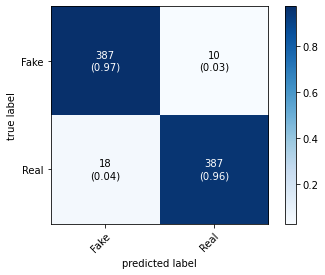

In [39]:
ph_pa_pred = ph_pa_clf.predict(ph_tfidf_test)

conf_mat = confusion_matrix(yph_test, ph_pa_pred)
plot_confusion_matrix(conf_mat,
                      show_normed=True, colorbar=True,
                      class_names=['Fake', 'Real'])

accscore = accuracy_score(yph_test, ph_pa_pred)
f1score = f1_score(yph_test,ph_pa_pred)

print('The accuracy of prediction is {:.2f}%.\n'.format(accscore*100))
print('The F1 score is {:.3f}.\n'.format(f1score))

The accuracy of prediction is 92.64%.

The F1 score is 0.925.



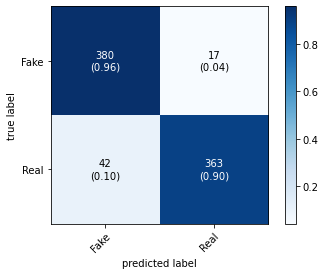

In [40]:
# Logistic Regression
ph_lr_clf = LogisticRegression(random_state = 0, penalty='l2', solver='saga', max_iter=5000)
ph_lr_clf.fit(ph_tfidf_train, yph_train)
ph_lr_pred = ph_lr_clf.predict(ph_tfidf_test)

conf_mat = confusion_matrix(yph_test, ph_lr_pred)
plot_confusion_matrix(conf_mat,
                      show_normed=True, colorbar=True,
                      class_names=['Fake', 'Real'])

accscore = accuracy_score(yph_test, ph_lr_pred)
f1score = f1_score(yph_test,ph_lr_pred)
print('The accuracy of prediction is {:.2f}%.\n'.format(accscore*100))
print('The F1 score is {:.3f}.\n'.format(f1score))

[0.92643391521197, 0.9650872817955112]


Text(0.5, 1.0, 'Model Accuracies')

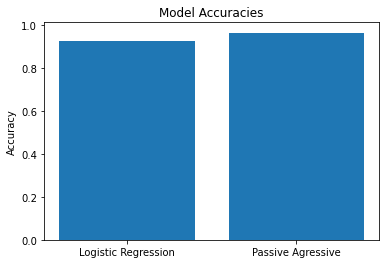

In [23]:
phmodels = ["Logistic Regression", "Passive Agressive"]
phaccuracies = [accuracy_score(yph_test, ph_lr_pred), accuracy_score(yph_test, ph_pa_pred)]
print(phaccuracies)

plt.bar(phmodels, phaccuracies)
plt.ylabel("Accuracy")
plt.title("Model Accuracies")

In [24]:
Xph = np.stack([ph_pa_pred, ph_lr_pred], 1)
Xph = (Xph == 0).astype(np.float32)

weights = np.linalg.inv(Xph.T@Xph)@(Xph.T@(yph_test == 0).astype(np.float32))
yph = Xph@weights
yph = np.where(yph > 0.5, 0, 1)

print(weights)
print( accuracy_score(yph_test, yph))

[0.88774014 0.06953335]
0.9650872817955112


In [42]:
def detectFakePH(content):
    """Function where you can input news content and it will return whether the 3 models believe it to be fake or real news"""
    phcontent_tf = ph_tfidf.transform([content])
    print("Judgement of each model:")
    print("\tPassive Aggressive: " + str(ph_pa_clf.predict(phcontent_tf)))
    print("\tLogistic Regression: " + str(ph_lr_clf.predict(phcontent_tf)))
    
    if ph_pa_clf.predict(phcontent_tf)==0:
        phvar_pa = 1.0
    else:
        phvar_pa = 0.0
    if ph_lr_clf.predict(phcontent_tf)==0:
        phvar_lr = 1.0
    else:
        phvar_lr = 0.0  
        
    #Gets weighted average to make final judgement whether the news is true or false
    Xph = np.stack([ph_pa_pred, ph_lr_pred], 1)
    Xph = (Xph == 0).astype(np.float32)

    weights = np.linalg.inv(Xph.T@Xph)@(Xph.T@(yph_test == 0).astype(np.float32))
    yph = Xph@weights
    yph = np.where(yph > 0.5, 0, 1)
    gwa = (weights[0] * phvar_pa) + (weights[1] * phvar_lr)
    
    if gwa >= 0.5:
        print("\nWe believe that the news is true")
    else:
        print("\nWe believe that the news is false")

In [46]:
detectFakePH("president bongbong marcos ay nanalo ng surbey bilang pinakamagaling na presidente ng pilipinas")

Judgement of each model:
	Passive Aggressive: [1]
	Logistic Regression: [1]

We believe that the news is false
